In [1]:
import pandas as pd
import glob
import os

In [2]:
csv_directory = "20180101_20231121_bist30/"

In [3]:
csv_files = glob.glob(os.path.join(csv_directory, "*.csv"))

In [5]:
data = pd.read_csv("20180101_20231121_bist30/20180101_20180401_bist30.csv")

In [6]:
data.head()

,timestamp,price,short_name
0,2018-01-02 09:00:00+03:00,15.79,THYAO
1,2018-01-02 10:00:00+03:00,16.01,THYAO
2,2018-01-02 11:00:00+03:00,16.05,THYAO
3,2018-01-02 12:00:00+03:00,16.05,THYAO
4,2018-01-02 13:00:00+03:00,16.06,THYAO


In [7]:
data = pd.DataFrame()

In [8]:
for file_path in csv_files:
    df = pd.read_csv(file_path)

    data = pd.concat([data, df],ignore_index=True)

In [9]:
data = data.groupby("short_name").apply(lambda x: x.sort_values(["timestamp"], ascending = True)).reset_index(drop=True)

In [12]:
data.drop_duplicates(subset=['short_name', 'timestamp'], keep='first', inplace=True)

In [13]:
data_pivot= data.pivot(index='timestamp', columns='short_name', values='price')

In [60]:
# correlation matrix
data_pivot.corr()[data_pivot.corr() > 0.95]

# print highly correlated values
# YKBNK and AKBNK are highly correlated

short_name,AKBNK,ARCLK,ASELS,BIMAS,DOHOL,EKGYO,EREGL,FROTO,GARAN,GUBRF,...,SISE,TAVHL,TCELL,THYAO,TKFEN,TTKOM,TUPRS,VAKBN,VESTL,YKBNK
short_name,,,,,,,,,,,,,,,,,,,,,
AKBNK,1.000000,NaN,0.960334,0.956508,0.952171,NaN,NaN,NaN,0.992619,NaN,...,NaN,0.956857,0.964001,0.978084,NaN,NaN,0.978716,NaN,NaN,0.985891
ARCLK,NaN,1.000000,0.966464,NaN,0.973363,NaN,NaN,0.985567,NaN,0.969483,...,0.985298,0.970228,0.966941,0.955657,NaN,0.966661,NaN,NaN,NaN,0.957574
ASELS,0.960334,0.966464,1.000000,0.960527,0.984010,0.962343,NaN,0.969425,0.956771,0.978174,...,0.966949,0.960964,0.985650,0.975620,NaN,0.968160,0.965300,NaN,NaN,0.974441
BIMAS,0.956508,NaN,0.960527,1.000000,0.969865,NaN,NaN,0.963755,0.967780,0.954977,...,NaN,NaN,0.971420,0.951404,NaN,NaN,0.968068,NaN,NaN,0.970428
DOHOL,0.952171,0.973363,0.984010,0.969865,1.000000,0.958506,NaN,0.980477,0.956934,0.988038,...,0.971377,0.964413,0.984013,0.971670,NaN,0.969763,0.956963,NaN,NaN,0.973930
EKGYO,NaN,NaN,0.962343,NaN,0.958506,1.000000,NaN,NaN,NaN,0.959544,...,0.972952,NaN,NaN,0.960391,NaN,0.971244,NaN,NaN,NaN,NaN
EREGL,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FROTO,NaN,0.985567,0.969425,0.963755,0.980477,NaN,NaN,1.000000,0.953480,0.975310,...,0.970728,0.963220,0.976634,0.968235,NaN,0.951930,NaN,NaN,NaN,0.965014
GARAN,0.992619,NaN,0.956771,0.967780,0.956934,NaN,NaN,0.953480,1.000000,NaN,...,NaN,0.963776,0.970779,0.977224,NaN,NaN,0.975637,NaN,NaN,0.985539


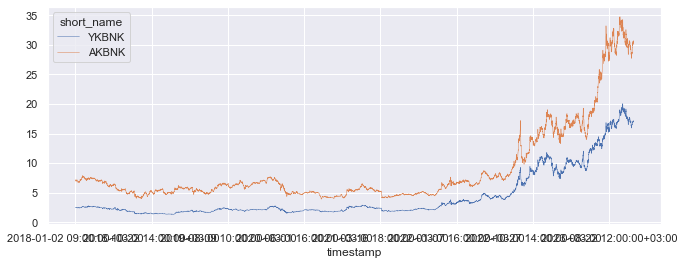

In [15]:
# Pair-1
data_pivot[["YKBNK", "AKBNK"]].plot(linewidth=0.5);
plt.show()

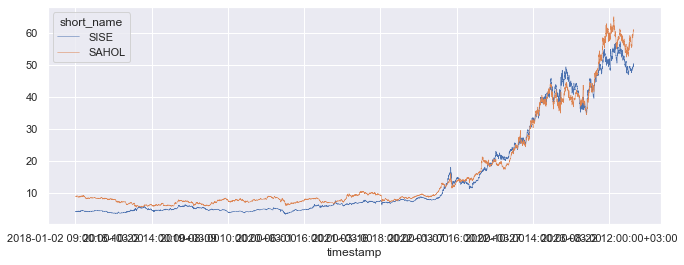

In [242]:
#Pair-2
data_pivot[["SISE", "SAHOL"]].plot(linewidth=0.5);
plt.show()

### Pair-I: Linear Regression Model

In [243]:
import statsmodels.api as sm

X = sm.add_constant(data_pivot["YKBNK"])
model = sm.OLS(data_pivot["AKBNK"], X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  AKBNK   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 5.079e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:17:16   Log-Likelihood:                -22303.
No. Observations:               14642   AIC:                         4.461e+04
Df Residuals:                   14640   BIC:                         4.463e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0124      0.013    152.604      0.000       1.987       2.038
YKBNK          1.5601      0.002    712.653      0.000       1.556       1.564
==============================================================================
Omnibus:                      482.475   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              943.817
Skew:                           0.243   Prob(JB):                    1.13e-205
Kurtosis:                       4.145   Cond. No.                         8.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
from sklearn.linear_model import LinearRegression

# Linear Regression
# YKBNK and AKBNK are highly correlated

model = LinearRegression()
model.fit(data_pivot[['YKBNK']], data_pivot[['AKBNK']])

# print model coefficients
print(f"Linear Regression Model: y_hat = {model.coef_[0][0]:.4f} * x + {model.intercept_[0]:.4f}")

Linear Regression Model: y_hat = 1.5601 * x + 2.0124


In [245]:
import numpy as np

residual_std = np.std(Residuals)

upper_control_limit = 1 * residual_std
lower_control_limit = -1* residual_std

<Figure size 792x288 with 0 Axes>

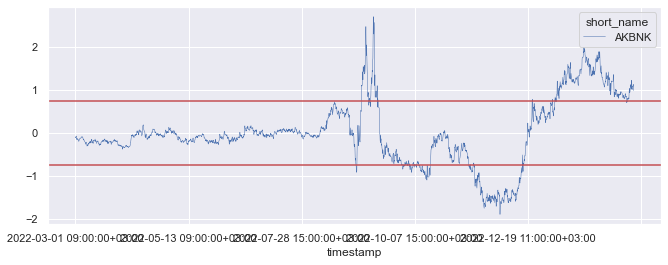

In [246]:
# Plot Control Chart and color the points that are out of control
plt.figure(figsize=(11,4))
Residuals.plot(linewidth=0.5);
plt.axhline(y=upper_control_limit[0], color='r', linestyle='-')
plt.axhline(y=lower_control_limit[0], color='r', linestyle='-')
plt.show()

In [247]:
data = data_pivot[['AKBNK', 'YKBNK']].copy()
train_data = data[((data.index<'2023-03-01')&(data.index>='2022-03-01'))]
test_data = data[data.index>='2023-03-01']

In [248]:
model = LinearRegression()
model.fit(train_data[['YKBNK']], train_data[['AKBNK']])
Residuals = train_data[['AKBNK']] - model.predict(train_data[['YKBNK']])
residual_std = np.std(Residuals)
residual_mean = np.mean(Residuals)
upper_control_limit = 1* residual_std
lower_control_limit = -1* residual_std

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [249]:
Residuals_test = test_data[['AKBNK']] - model.predict(test_data[['YKBNK']])

<Figure size 792x288 with 0 Axes>

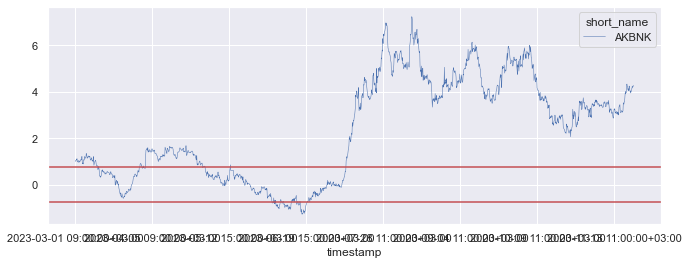

In [250]:
# Plot the residuals
plt.figure(figsize=(11,4))
Residuals_test.plot(linewidth=0.5);
plt.axhline(y=upper_control_limit[0], color='r', linestyle='-')
plt.axhline(y=lower_control_limit[0], color='r', linestyle='-')
plt.show()

In [253]:
# Identify the buy and sell signals
positions = np.zeros(len(Residuals_test.AKBNK))
buy_signals = Residuals_test.AKBNK<lower_control_limit[0]
sell_signals = Residuals_test.AKBNK>upper_control_limit[0]
positions[buy_signals] = -1
positions[sell_signals] = 1

# Remove the consecutive buy and sell signals
for i in range(0, len(positions)-1):
    if positions[i+1] == 1 and sell_signals[i]:
        positions[i+1] = 0
    elif positions[i+1] == -1 and buy_signals[i]:
        positions[i+1] = 0

# Measure the returns
returns_1 = test_data[['AKBNK']]* positions.reshape(-1,1)
returns_2 = test_data[['YKBNK']] * -1*positions.reshape(-1,1)
returns = returns_1 + returns_2
cumulative_returns = returns.cumsum()

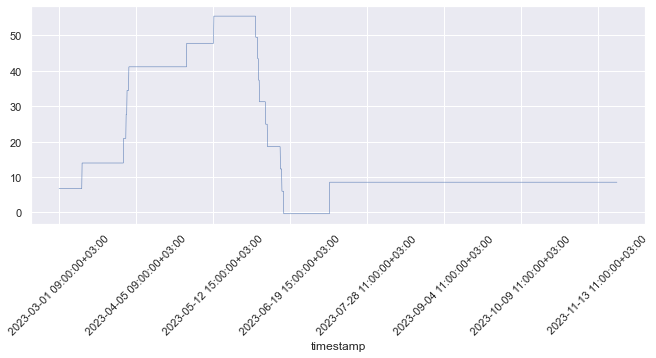

In [134]:
# Plot the cumulative returns
plt.figure(figsize=(11,4))
cumulative_returns.plot(linewidth=0.5);
plt.xticks(rotation=45)
plt.show()

### Pair-II: Linear Regression

In [254]:
data = data_pivot[['SISE', 'SAHOL']].copy()
train_data = data[((data.index<'2023-03-01')&(data.index>='2022-03-01'))]
test_data = data[data.index>='2023-03-01']

In [255]:
model = LinearRegression()
model.fit(train_data[['SISE']], train_data[['SAHOL']])
Residuals = train_data[['SISE']] - model.predict(train_data[['SAHOL']])
residual_std = np.std(Residuals)
residual_mean = np.mean(Residuals)
upper_control_limit = 1* residual_std
lower_control_limit = -1* residual_std

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SAHOL
Feature names seen at fit time, yet now missing:
- SISE

  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<Figure size 792x288 with 0 Axes>

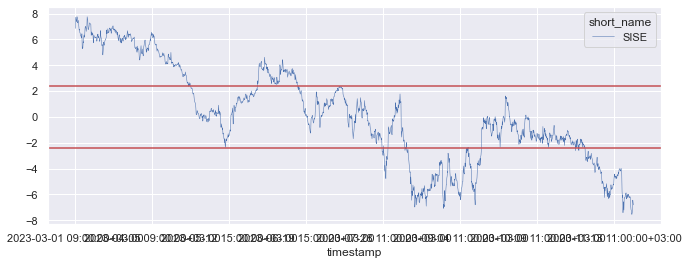

In [320]:
Residuals_test = test_data[['SISE']] - model.predict(test_data[['SAHOL']])
# Plot the residuals
plt.figure(figsize=(11,4))
Residuals_test.plot(linewidth=0.5);
plt.axhline(y=upper_control_limit[0], color='r', linestyle='-')
plt.axhline(y=lower_control_limit[0], color='r', linestyle='-')
plt.show()

In [270]:
# Identify the buy and sell signals
positions = np.zeros(len(Residuals_test.SISE))
buy_signals = Residuals_test.SISE<lower_control_limit[0]
sell_signals = Residuals_test.SISE>upper_control_limit[0]
positions[buy_signals] = -1
positions[sell_signals] = 1

# Remove the consecutive buy and sell signals
for i in range(0, len(positions)-1):
    if positions[i+1] == 1 and sell_signals[i]:
        positions[i+1] = 0
    elif positions[i+1] == -1 and buy_signals[i]:
        positions[i+1] = 0

# Measure the returns
returns_1 = test_data[['SISE']]* positions.reshape(-1,1)
returns_2 = test_data[['SAHOL']] * -1*positions.reshape(-1,1)
returns = returns_1["SISE"] + returns_2["SAHOL"]
cumulative_returns = returns.cumsum()

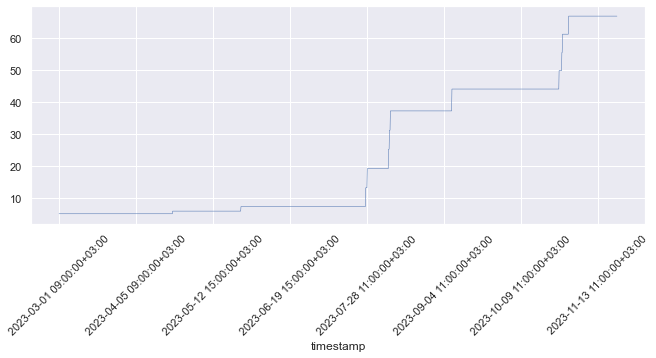

In [272]:
# Plot the cumulative returns
plt.figure(figsize=(11,4))
cumulative_returns.plot(linewidth=0.5);
plt.xticks(rotation=45)
plt.show()

### Time Series Analysis

In [149]:
# Get the stationary time series
data = data_pivot[['AKBNK', 'YKBNK']].copy()
#data = data.diff(30).dropna()

In [227]:
# Train -Test Split
data = data_pivot[['AKBNK', 'YKBNK']].copy()
train_data = data[(data.index>='2023-03-01')]
data_2 = data[(data.index>='2023-03-01')]

In [230]:
#Import the libraries
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Check stationarity
def check_stationarity(train_data,threshold=0.05):
    result = adfuller(train_data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    return result[1]<threshold

# Get the stationary time series
for col in train_data.columns:

    if check_stationarity(train_data[col]):
        train_data[col] = train_data[col].diff().dropna()


# Get appropriate lags
model = VAR(train_data)
x = model.select_order(maxlags=15)
lag = x.selected_orders['aic']

# cointegration test
coint_test = coint_johansen(train_data, det_order=0, k_ar_diff=lag)

# Get the residuals
residuals = train_data.dot(coint_test.evec[:, 0])

# SARIMAX
model = SARIMAX(residuals, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Get the SARIMAX residuals
residuals = model_fit.resid
resid_df = pd.DataFrame(residuals,columns=["Residuals"])
resid_df["Z-Score"] = (residuals - np.mean(residuals))/np.std(residuals)

ADF Statistic: 1.362757
p-value: 0.996938
ADF Statistic: 1.480542
p-value: 0.997451


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1813
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1439.369
Date:                Mon, 11 Dec 2023   AIC                          -2874.738
Time:                        00:13:20   BIC                          -2863.732
Sample:                             0   HQIC                         -2870.677
                               - 1813                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9975      0.001    751.376      0.000       0.995       1.000
sigma2         0.0119      0.000     69.096      0.000       0.012       0.012
Ljung-Box (L1) (Q):                  14.64   Jarque-

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


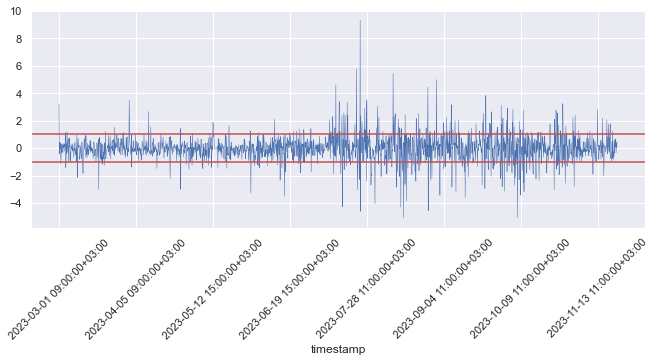

In [231]:
# Plot the Z-Score
plt.figure(figsize=(11,4))
resid_df["Z-Score"].plot(linewidth=0.5);
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=-1, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()

In [233]:
# Identify the buy and sell signals
positions = np.zeros(len(resid_df["Z-Score"]))
buy_signals = resid_df["Z-Score"]<-1
sell_signals = resid_df["Z-Score"]>1
positions[buy_signals] = -1
positions[sell_signals] = 1

# Remove the consecutive buy and sell signals
for i in range(0, len(positions)-1):
    if positions[i+1] == 1 and sell_signals[i]:
        positions[i+1] = 0
    elif positions[i+1] == -1 and buy_signals[i]:
        positions[i+1] = 0

# Measure the returns

returns_1 = data_2[['AKBNK']]* positions.reshape(-1,1)
returns_2 = data_2[['YKBNK']] * -1*positions.reshape(-1,1)

returns = returns_1.AKBNK + returns_2.YKBNK
cumulative_returns=np.cumsum(returns)

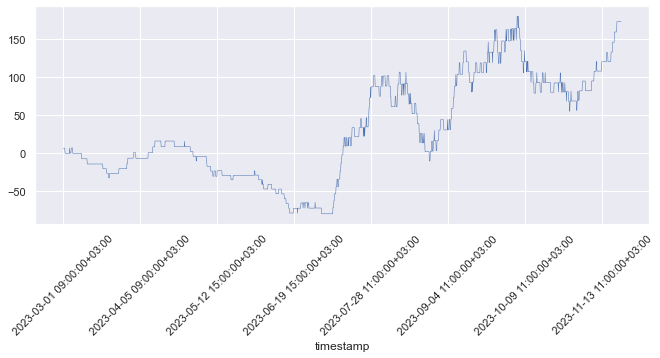

In [241]:
plt.figure(figsize=(11,4))
cumulative_returns.plot(linewidth=0.5);
plt.xticks(rotation=45)
plt.show()

### Pair-II: Time Series Analysis

In [273]:
# Get the stationary time series
data = data_pivot[['SISE', 'SAHOL']].copy()
#data = data.diff(30).dropna()

In [276]:
# Train -Test Split
data = data_pivot[['SISE', 'SAHOL']].copy()
train_data = data[(data.index>='2023-03-01')].dropna()
data_2 = data[(data.index>='2023-03-01')].dropna()

In [302]:
#Import the libraries
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


def check_stationarity(train_data,threshold=0.05):
    result = adfuller(train_data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    return result[1]<threshold

for col in train_data.columns:

    if check_stationarity(train_data[col]):
        train_data[col] = train_data[col].diff().dropna()

# Get appropriate lags
model = VAR(train_data)
x = model.select_order(maxlags=15)
lag = x.selected_orders['aic']

# cointegration test
coint_test = coint_johansen(train_data, det_order=0, k_ar_diff=lag)

residuals = train_data.dot(coint_test.evec[:, 0])
# SARIMAX
model = SARIMAX(residuals, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = model_fit.resid
residuals=residuals[1:]
resid_df = pd.DataFrame(residuals,columns=["Residuals"])
resid_df["Z-Score"] = (residuals - np.mean(residuals))/np.std(residuals)

ADF Statistic: -1.324726
p-value: 0.617785
ADF Statistic: -0.795536
p-value: 0.820430


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1813
Model:               SARIMAX(1, 0, 0)   Log Likelihood                1259.590
Date:                Mon, 11 Dec 2023   AIC                          -2515.181
Time:                        00:33:35   BIC                          -2504.175
Sample:                             0   HQIC                         -2511.120
                               - 1813                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.000   6257.717      0.000       0.999       1.000
sigma2         0.0145      0.000     62.193      0.000       0.014       0.015
Ljung-Box (L1) (Q):                   0.14   Jarque-

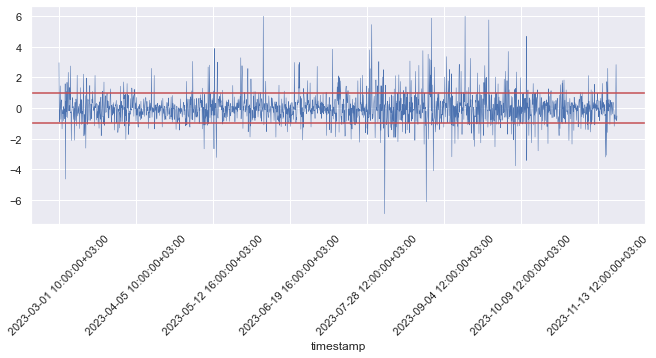

In [303]:
# Plot the Z-Score
plt.figure(figsize=(11,4))
resid_df["Z-Score"].plot(linewidth=0.5);
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=-1, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.show()

In [308]:
#Identify the signals
positions = np.zeros(len(resid_df["Z-Score"]))
buy_signals = resid_df["Z-Score"]<-1
sell_signals = resid_df["Z-Score"]>1
positions[buy_signals] = -1
positions[sell_signals] = 1

#Eliminate the signals that are too close to each other

for i in range(0, len(positions)-1):
    if positions[i+1] == 1 and sell_signals[i]:
        positions[i+1] = 0
    elif positions[i+1] == -1 and buy_signals[i]:
        positions[i+1] = 0

#Get the returns

returns_1 = data_2.iloc[1:,[0]]* positions.reshape(-1,1)
returns_2 = data_2.iloc[1:,[1]]*-1* positions.reshape(-1,1)
returns = returns_1.SISE + returns_2.SAHOL
cumulative_returns=np.cumsum(returns)

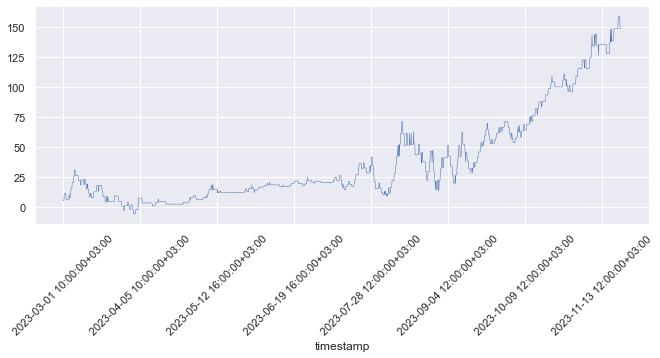

In [319]:
plt.figure(figsize=(11,4))
cumulative_returns.plot(linewidth=0.5);
plt.xticks(rotation=45)
plt.show()